# Libraries required

In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import seaborn as sns

# The IRIS Dataset

Il dataset IRIS contiene informazioni sulla lunghezza e larghezza dei sepal e dei petali e il target è uno tra Iris-Verginica e Iris-Versicolor, tre tipologie di fiori.

In [2]:
iris = datasets.load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

I primi 50 samples sono setosa, i secondi 50 sono versicolor e gli ultimi 50 sono virginica.
Vediamo dal sample 45 a 55:

In [8]:
start = 0
print(iris['data'][start:start+10])
print([iris['target_names'][x] for x in iris['target'][start:start+10]])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa']


## Plot in 2D

Prendiamo le prime due feature e creiamo uno `scatter` plot.



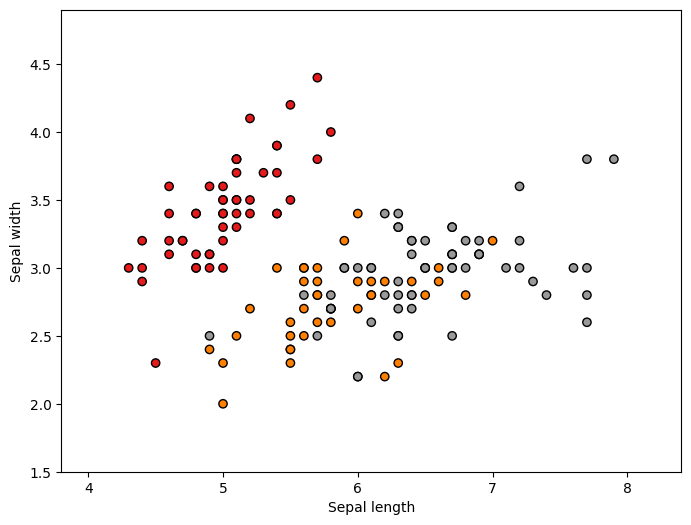

In [24]:
# Prendiamo le prime due features (sepal length e sepal width)
# ndarray: il primo indice (:) significa che prendiamo tutte le righe, il secondo indice (:2) significa che prendiamo la colonna 0 e 1.
X = iris.data[:, :2] # size = 150. Matrice con le prime due colonne del dataset.
y = iris.target # array con gli indici dei target (0=setosa,1=versicolor,2=virginica) (size = 150)

# ricaviamo il massimo e il minimo di ciascuna feature.
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6)) # 2 e' un identificatore della figura
plt.clf() # pulisce la figura

# Plot the training points (tutte le righe, della colonna 0 sono la x e tutte le righe della colonna 1 sono le y)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k") # c= color, cmap = mappa colori
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# per togliere i ticks
# plt.xticks(())
# plt.yticks(())

plt.show()

Per ogni categoria del target, i punti hanno un colore diverso. I punti rossi (setosa) sono linearmente separabili dagli altri due colori, in quanto hanno la larghezza del sepalo maggiore delle altre.

## Plot in 3D con PCA Feature Selection

Applichiamo la PCA (Principal Component Analysis) per ottenere le feature più significative e prendiamo le prime 3 dimensioni. Quindi creiamo uno `scatter` in 3D.

[[-2.68412563  0.31939725 -0.02791483]
 [-2.71414169 -0.17700123 -0.21046427]
 [-2.88899057 -0.14494943  0.01790026]
 [-2.74534286 -0.31829898  0.03155937]
 [-2.72871654  0.32675451  0.09007924]
 [-2.28085963  0.74133045  0.16867766]
 [-2.82053775 -0.08946138  0.25789216]
 [-2.62614497  0.16338496 -0.02187932]
 [-2.88638273 -0.57831175  0.02075957]
 [-2.6727558  -0.11377425 -0.19763272]]


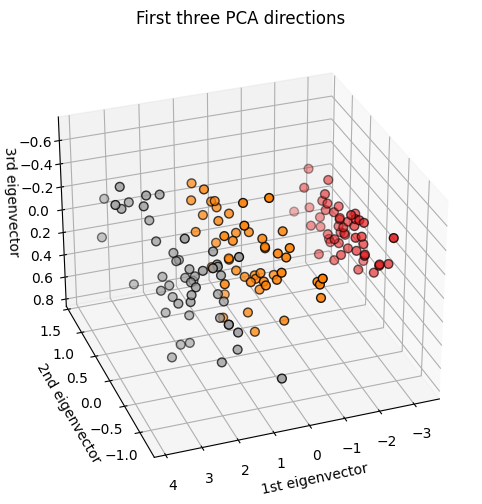

In [25]:
# To get a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110) 
# azim = angolo azimutale, permette di ruotare sull'asse verticale (dello schermo) - esempio palo barbiere
# elev = ancolo di elevazione, permette di ruotare sull'asse orizzontale (dello schermo) - esempio pollo arrosto

# eseguiamo una feature selection PCA prendendo le prime 3 feature (delle 4) sul dataset, e togliamo la meno utile.
X_reduced = PCA(n_components=3).fit_transform(iris.data)
print(X_reduced[:10, :])
ax.scatter(
    X_reduced[:, 0], # la prima migliore feature
    X_reduced[:, 1], # la seconda miglior feature
    X_reduced[:, 2], # la terza
    c=y, # numero di colori. Può essere anche altro, ma qui usiamo un intero.
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
# imposta i titoli e toglie i ticks
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector") # autovettori
# ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
# ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
# ax.zaxis.set_ticklabels([])

plt.show()

In [26]:
# creo un dataframe a partire dal dizionario iris. La differenza è che il dataframe ha anche i nomi delle colonne.
iris_df = pd.DataFrame({
    "SepalLengthCm": iris['data'][:, 0],
    "SepalWidthCm": iris['data'][:, 1],
    "PetalLengthCm": iris['data'][:, 2],
    "PetalWidthCm": iris['data'][:, 3],
    "Species": iris['target'],
})

iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Sns Pairplot
è il grafico di una distribuzione univariata, che rappresenta la distribuzione marginale dei dati su ogni colonna.

Gli altri grafici permettono di visualizzare gli scatter plot di una feature rispetto all'altra con tutti i target.

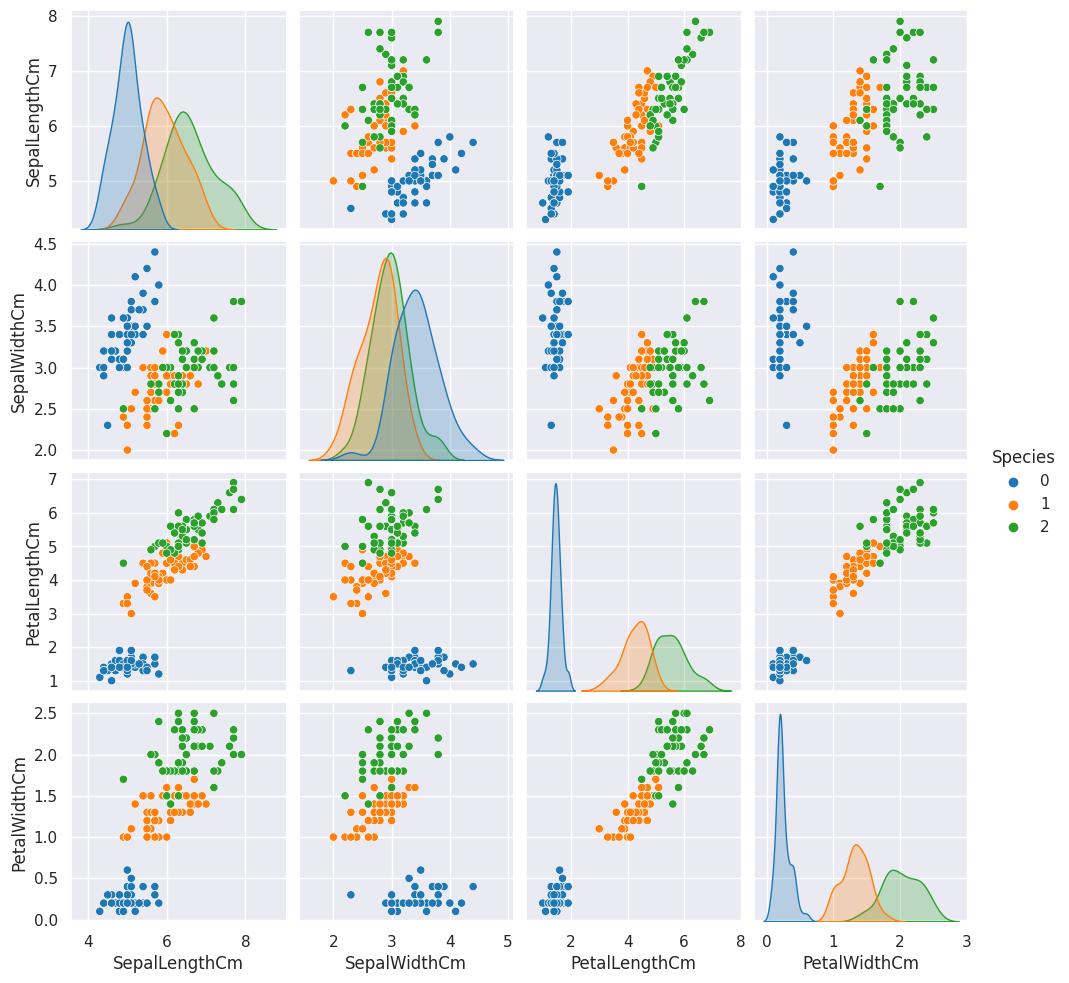

In [28]:
# Paired plot using seaborn
sns.set()
sns.pairplot(iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']],
             hue="Species", diag_kind="kde", palette="tab10")

More about visualization in Jupyter here:
https://jupyterbook.org/en/stable/interactive/interactive.html

# KNN

KNN (K-Nearest Neighbor) è un algoritmo di apprendimento supervisionato che possiamo usare per assegnare una classe a un vettore di features. Può anche essere usato per la regressione. KNN è un algoritmo **non parametrico** perché non fa alcuna assunzione sulla distribuzione dei dati. KNN predice la classe calcolando la similarità dell'esempio di input con ciascuna delle istanze di training.

Passi di KNN:
1.   Calcola la distanza tra il nuovo input con ogni esempio del dataset di training. La distanza può essere la distanza Euclidea, di Hamming o di Manhattan.
2.   Scegli il numero di punti K nel training set, che sono i più vicini al nuovo esempio di dati.
3.   Esegui una **votazione a maggioranza**. La classe/etichetta più comune tra le K sarà la classe dell'esempio dato in input.
    In caso di regressione, avremmo fatto la **media**

Nell'immagine seguente, nel cerchio di raggio k=3, la classe del punto indicato dalla stella è la classe B perché la maggioranza dei punti "vicini" è di classe B. Se invece i vicini fossero nel cerchio di raggio k=6, la classe del punto è A.

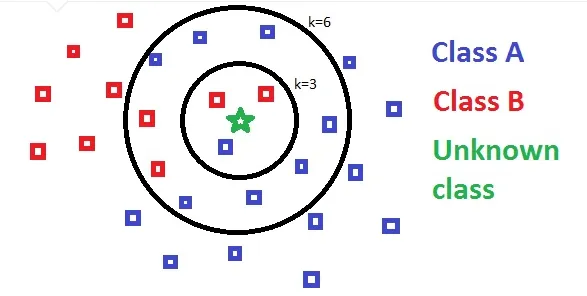

Il nostro obiettivo è quello di costruire un modello KNN che classifica il nuovo esempio in base alle misurazione di sepali e petali.

In [31]:
# X = iris.data
# y = iris.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4) # 80% training, 20% testing. random_state è un seed.

knn_model = KNeighborsClassifier(n_neighbors=3)

# eseguiamo 5-fold cross validation. In ciascuno, 1/5 del dataset è usato come testing e 4/5 del dataset come training
scores = cross_val_score(knn_model, iris.data, iris.target, cv=10)
# otteniamo 5 risultati di accuracy.
print(scores)

[1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.93333333 1.         1.         1.        ]


In [32]:
# ricaviamo media e deviazione standard dell'accuratezza delle 5 fold
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.97 accuracy with a standard deviation of 0.04


Come è implementato il modello KNN in python? Possiamo vedere come è fatto usando `inspect`

In [33]:
import inspect
print(inspect.getsource(knn_model.fit))

    def fit(self, X, y):
        """Fit the k-nearest neighbors classifier from the training dataset.

        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features) or \
                (n_samples, n_samples) if metric='precomputed'
            Training data.

        y : {array-like, sparse matrix} of shape (n_samples,) or \
                (n_samples, n_outputs)
            Target values.

        Returns
        -------
        self : KNeighborsClassifier
            The fitted k-nearest neighbors classifier.
        """
        self._validate_params()

        return self._fit(X, y)



Vediamo il metodo privato `_fit`.

In [34]:
print(inspect.getsource(knn_model._fit))

    def _fit(self, X, y=None):
        if self._get_tags()["requires_y"]:
            if not isinstance(X, (KDTree, BallTree, NeighborsBase)):
                X, y = self._validate_data(
                    X, y, accept_sparse="csr", multi_output=True, order="C"
                )

            if is_classifier(self):
                # Classification targets require a specific format
                if y.ndim == 1 or y.ndim == 2 and y.shape[1] == 1:
                    if y.ndim != 1:
                        warnings.warn(
                            "A column-vector y was passed when a "
                            "1d array was expected. Please change "
                            "the shape of y to (n_samples,), for "
                            "example using ravel().",
                            DataConversionWarning,
                            stacklevel=2,
                        )

                    self.outputs_2d_ = False
                    y = y.reshape((-1, 1))
         

### Let's find the best *k*, i.e. the value of neighbors that maximize the accuracy in classification

Esercizio svolto by Giacomo.

In [44]:
folds = 3
best_k = 1 
best_mean = 0.0
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4) # 80% training, 20% testing. random_state è un seed.
# ricavo il massimo numero k, pari al numero di esempi nel training in ogni fold. Ad esempio con 5 fold, avrei 4/5*len(train)
max_k = len(X_train) * (folds - 1) // folds  # //: divisione intera
print("max_k: ", max_k)
for k in range(1, max_k):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    # eseguiamo n-fold cross validation. In ciascuno, 1/5 del dataset è usato come testing e 4/5 del dataset come training
    scores = cross_val_score(knn_model, X_train, y_train, cv=folds)
    # otteniamo n risultati di accuracy.
    mean = scores.mean()
    if mean > best_mean:
        best_k = k
        best_mean = mean

print("Training: best k: ", best_k, "Training: best accuracy: ", best_mean)

max_k:  80
best k:  9 best accuracy:  0.9916666666666667


In [48]:
from sklearn.metrics import classification_report


best_model= KNeighborsClassifier(n_neighbors=best_k)

best_model.fit(X_train, y_train)

# usiamo il modello sul training set per ottenre le sue performance sui dati noti
y_pred = best_model.predict(X_train) # gli faccio predire gli stessi dati
print("Training set report:\n", classification_report(y_train, y_pred, target_names=iris['target_names']))

# usaimo il modello su dati nuovi e confrontiamo le performance.
y_pred = best_model.predict(X_test)

print("Testing set report:\n", classification_report(y_test, y_pred, target_names=iris['target_names']))

Training set report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       0.98      0.98      0.98        45
   virginica       0.98      0.98      0.98        41

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

Testing set report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.80      0.89         5
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



Risultati: 
- Con 5 folds, il miglior k è 6.
- Con 10 folds, il miglior k è 13.
- L'accuracy media è sempre 0.98 sul training set.
- L'accuracy media è 0.97 sul testing set.